## PROJET : Système de détection des fausses et vraies informations(Fake News Detection System)
### Description du projet
Ce projet vise à développer un système capable de détecter les fausses informations (fake news) en utilisant des techniques d'apprentissage automatique et de traitement du langage naturel. Le système analysera des articles, des publications sur les réseaux sociaux et d'autres sources d'information pour évaluer leur véracité.
### Objectifs
1. **Collecte de données** : Rassembler un ensemble de données comprenant des articles étiquetés comme vrais ou faux.
2. **Prétraitement des données** : Nettoyer et préparer les données pour l'analyse, y compris la tokenisation, la suppression des stop words et la normalisation.
3. **Exploration des données** : Analyser les données pour identifier les caractéristiques clés qui peuvent aider à distinguer les fausses informations des vraies.
4. **Modélisation** : Développer et entraîner des modèles d'apprentissage automatique pour classer les articles comme vrais ou faux.
5. **Évaluation** : Évaluer les performances des modèles en utilisant des métriques appropriées telles que la précision, le rappel et la F-mesure.
6. **Déploiement** : Mettre en place une interface utilisateur pour permettre aux utilisateurs de soumettre des articles et de recevoir une évaluation de leur véracité.
### Technologies et outils
- **Langages de programmation** : Python
- **Bibliothèques** : Scikit-learn, NLTK, Pandas, NumPy, Matplotlib
- **Frameworks de machine learning** : TensorFlow, Keras
- **Base de données** : SQLite ou MongoDB pour stocker les articles et leurs étiquettes
- **Environnement de développement** : Jupyter Notebook ou PyCharm

### Résultats attendus
- Un système capable de classer les articles comme vrais ou faux avec une précision acceptable.
- Une interface utilisateur fonctionnelle permettant aux utilisateurs de soumettre des articles.
- Un rapport détaillant les performances du modèle et les défis rencontrés lors du développement.

#### Importation des bibliothèques nécessaires
```python


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score, adjusted_rand_score, precision_recall_curve, roc_auc_score, roc_curve, recall_score,f1_score, precision_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
# Suppress warnings for cleaner output
import warnings, re, os, sys


warnings.filterwarnings("ignore")

#### Loading the dataset et Transformation the files .tsv to .csv

In [2]:
fake = pd.read_csv('/home/dona-erick/Fake_News/Dataset/Fake.csv')
true = pd.read_csv('/home/dona-erick/Fake_News/Dataset/True.csv')
# convert the file .tsv to .csv
train = pd.read_csv('/home/dona-erick/Fake_News/dataset_initial/train.tsv', sep="\t")
train.to_csv("/home/dona-erick/Fake_News/Dataset/train.csv", index=False)

# test file
test = pd.read_csv('/home/dona-erick/Fake_News/dataset_initial/test.tsv', sep="\t")
test.to_csv("/home/dona-erick/Fake_News/Dataset/test.csv", index=False)

# valid data
valid = pd.read_csv('/home/dona-erick/Fake_News/dataset_initial/valid.tsv', sep="\t")
valid.to_csv("/home/dona-erick/Fake_News/Dataset/valid.csv", index=False)


### Display of data (fake, train, true)

In [3]:
train.head()

,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.1,0.2,0.3,a mailer
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [4]:
test.head()

,11972.json,true,Building a wall on the U.S.-Mexico border will take literally years.,immigration,rick-perry,Governor,Texas,republican,30,30.1,42,23,18,Radio interview
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website


In [5]:
true_news = pd.read_csv('/home/dona-erick/Fake_News/Dataset/True_news.csv')
true_news.head()

,title,description,author,content,published_at,source,category
0,China's Honor launches new challenge to Samsun...,"Honor launched the Magic V5 on Wednesday, it's...",Arjun Kharpal,Honor on Wednesday touted the slimness and bat...,2025-07-02 12:01:24,CNBC,general
1,European heat wave closes Eiffel Tower’s top f...,The heat wave that has blanketed much of Europ...,"Andrew Jeong, Ben Noll","In Paris, blistering heat led the Eiffel Tower...",2025-07-02 11:30:55,The Washington Post,general
2,"US pauses some munitions shipments to Ukraine,...",The Trump administration is pausing some weapo...,"Kristen Holmes, Lex Harvey",The Trump administration is pausing some weapo...,2025-07-02 11:19:00,CNN,general
3,"Democrats, the last holdout bears, could be th...",Ned Davis strategists say politics are keeping...,Barbara Kollmeyer,"The S&amp;P 500, basking in the glow of record...",2025-07-02 10:56:00,MarketWatch,general
4,CBS owner Paramount settles Trump lawsuit over...,The money will go to Trump’s future presidenti...,Jeremy Barr,"Paramount, the parent company of CBS News, has...",2025-07-02 10:54:13,The Washington Post,general


#### Description of the dataset

In [6]:
print("Fake News Dataset Shape:", fake.shape)
print("True News Dataset Shape:", true.shape)
print("TRue_News Dataset Shape:", true_news.shape)
print(f"train Dataset Shape:{train.shape}\n test shape dataset {test.shape}\n the valid dataset {valid.shape}")

Fake News Dataset Shape: (23481, 4)
True News Dataset Shape: (21417, 4)
TRue_News Dataset Shape: (725, 7)
train Dataset Shape:(10239, 14)
 test shape dataset (1266, 14)
 the valid dataset (1283, 14)


In [7]:
true.describe(include='all')

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [8]:
true_news.describe(include='all')

,title,description,author,content,published_at,source,category
count,725,713,564,701,725,725,725
unique,121,118,96,115,116,77,7
top,S&P 500 Gains and Losses Today: Centene Pulls ...,Whole-genome sequencing study found air pollut...,Michael Bromberg,"The Lakers got their center, and its the guy d...",2025-07-02 19:58:00,NPR,technology
freq,29,29,29,29,29,43,234


In [9]:
print(f""" Informations on true_news_collected {true_news.info()}\n
    the informations of true dataset {true.info()}""")
true_news.isnull().sum()
true.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         725 non-null    object
 1   description   713 non-null    object
 2   author        564 non-null    object
 3   content       701 non-null    object
 4   published_at  725 non-null    object
 5   source        725 non-null    object
 6   category      725 non-null    object
dtypes: object(7)
memory usage: 39.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
 Informations on true_news_collected None

    the informations of true dataset None


title      0
text       0
subject    0
date       0
dtype: int64

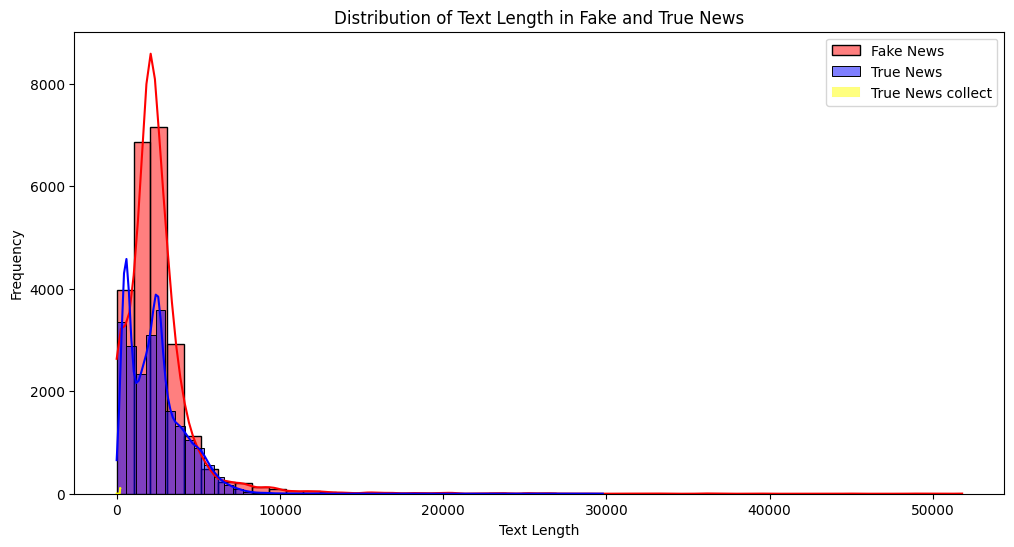

In [10]:
## count the length of the text in the fake and true news datasets
datafake_copy = fake.copy()
datatrue_copy = true.copy()
datatruenews_copy =true_news.copy()
datafake_copy['text_length'] = datafake_copy['text'].apply(lambda x: len(str(x)))
datatrue_copy['text_length'] = datatrue_copy['text'].apply(lambda x: len(str(x)))
datatruenews_copy['text_length'] = datatruenews_copy['content'].apply(lambda x: len(str(x)))

# Plotting the distribution of text length in fake and true news datasets
plt.figure(figsize=(12, 6))
sns.histplot(datafake_copy['text_length'], bins=50, color='red', label='Fake News', kde=True)
sns.histplot(datatrue_copy['text_length'], bins=50, color='blue', label='True News', kde=True)
sns.histplot(datatruenews_copy['text_length'], bins=50, color='yellow', label='True News collect', kde=True)

plt.title('Distribution of Text Length in Fake and True News')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

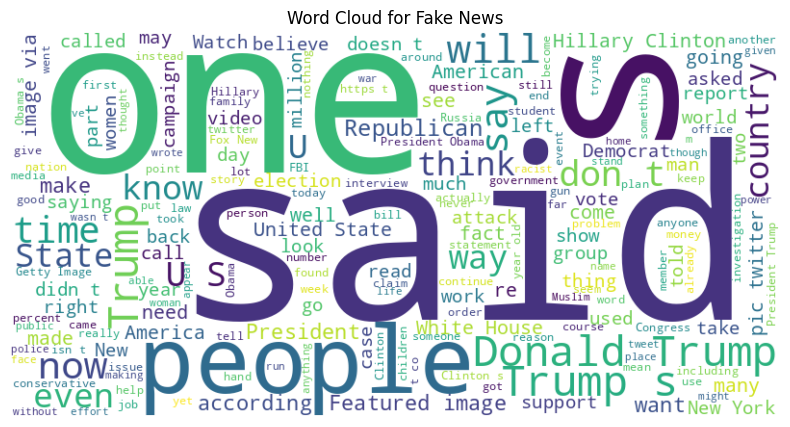

In [11]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
def plot_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
plot_wordcloud(fake, 'Word Cloud for Fake News')

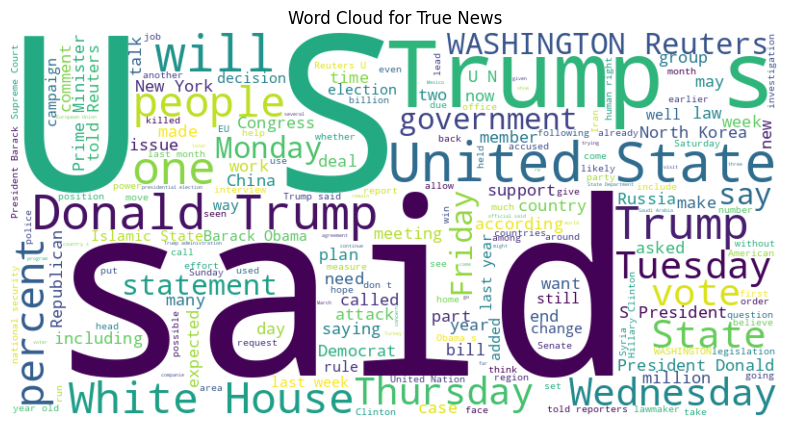

In [12]:
plot_wordcloud(true, 'Word Cloud for True News')

#### Attributes the labels on each article

In [13]:
fake['label'] = 0
true['label'] = 1
true_news["label"]=1

true_news_data = true_news[["title","author", "content", "description", "label"]]
true_news_data.head()


,title,author,content,description,label
0,China's Honor launches new challenge to Samsun...,Arjun Kharpal,Honor on Wednesday touted the slimness and bat...,"Honor launched the Magic V5 on Wednesday, it's...",1
1,European heat wave closes Eiffel Tower’s top f...,"Andrew Jeong, Ben Noll","In Paris, blistering heat led the Eiffel Tower...",The heat wave that has blanketed much of Europ...,1
2,"US pauses some munitions shipments to Ukraine,...","Kristen Holmes, Lex Harvey",The Trump administration is pausing some weapo...,The Trump administration is pausing some weapo...,1
3,"Democrats, the last holdout bears, could be th...",Barbara Kollmeyer,"The S&amp;P 500, basking in the glow of record...",Ned Davis strategists say politics are keeping...,1
4,CBS owner Paramount settles Trump lawsuit over...,Jeremy Barr,"Paramount, the parent company of CBS News, has...",The money will go to Trump’s future presidenti...,1


In [14]:
## conbined the title, content and description for doing the one_columns text

true_news_data["text"] = true_news_data['title'] + "" + true_news_data['content']+ "" + true_news_data["description"]
true_news_data.sample(10) 

,title,author,content,description,label,text
49,Nothing’s ‘first true flagship’ phone plays it...,Dominic Preston,The Phone 3 is coming to the US this month wit...,The Nothing Phone 3 is coming to the US on Jul...,1,Nothing’s ‘first true flagship’ phone plays it...
118,European heat wave closes Eiffel Tower’s top f...,"Andrew Jeong, Ben Noll","In Paris, blistering heat led the Eiffel Tower...",The heat wave that has blanketed much of Europ...,1,European heat wave closes Eiffel Tower’s top f...
368,"Perseids, A Full ‘Buck Moon’ And A Small Sun: ...",Jamie Carter,The Perseid meteor shower begins this month. \...,"July 2025 offers dazzling views of Mercury, Ve...",1,"Perseids, A Full ‘Buck Moon’ And A Small Sun: ..."
342,Common farm fungicide may be contributing to '...,Fran Molloy,A widely-used agricultural chemical sprayed on...,A widely-used agricultural chemical sprayed on...,1,Common farm fungicide may be contributing to '...
235,"Around 250 million years ago, Earth was near-l...","Andrew Merdith, Benjamin J. W. Mills, Zhen Xu","Some 252 million years ago, almost all life on...",The answer confirms scientists’ suspicion that...,1,"Around 250 million years ago, Earth was near-l..."
266,Subnautica Co-Creators Removed From Unknown Wo...,Joshua Robertson,Subnautica 2 is one of this year's most highly...,Subnautica 2 developer Unknown Worlds&#039; le...,1,Subnautica Co-Creators Removed From Unknown Wo...
122,Federal judge blocks Trump administration from...,The Associated Press,NEW YORK A federal judge in New York on Tuesda...,NEW YORK — A federal judge in New York on Tues...,1,Federal judge blocks Trump administration from...
243,Qantas cyber hack could have stolen ‘significa...,Jessie Yeung,Australian airline Qantas says a data hack on ...,Australian airline Qantas says a data hack on ...,1,Qantas cyber hack could have stolen ‘significa...
676,RSV vaccine access expanded to some people in ...,NaN,The Trump administration appears to be expandi...,The Trump administration appears to be expandi...,1,RSV vaccine access expanded to some people in ...
300,Netflix teams up with NASA to show live rocket...,Andrew Liszewski,NASA Plus is hoping to reach a wider audience ...,"Starting this summer, NASA Plus’ content like ...",1,Netflix teams up with NASA to show live rocket...


In [15]:
true["text_news"] = true['title']+ "" + true['text']

## true_dataset on features are:
data_true = true[['text_news', "label"]]

data_true_news = true_news_data[['text', 'label']]

## concatenate the truennews

data_true_concatenate = pd.concat([data_true_news, data_true], ignore_index=True)

data_true_concatenate.sample(5)


,text,label,text_news
7705,NaN,1,Separation anxiety: Trump’s management style p...
7210,NaN,1,Trump to seek probe of secret report he says w...
18182,NaN,1,Car bombs kill at least 22 in Somalia's capita...
3228,NaN,1,U.S. Treasury's Mnuchin urges Congress to lift...
5847,NaN,1,Former U.S. intelligence chief rejects Trump w...


In [16]:
data_true_concatenate["text"].isnull().sum()

np.int64(21446)

In [17]:
data_true_concatenate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22142 entries, 0 to 22141
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       696 non-null    object
 1   label      22142 non-null  int64 
 2   text_news  21417 non-null  object
dtypes: int64(1), object(2)
memory usage: 519.1+ KB


In [18]:
data_true_concatenate["text"]= data_true_concatenate['text'].replace("NaN", "Unknown")

In [19]:
data_true_concatenate.head(10)

,text,label,text_news
0,China's Honor launches new challenge to Samsun...,1,NaN
1,European heat wave closes Eiffel Tower’s top f...,1,NaN
2,"US pauses some munitions shipments to Ukraine,...",1,NaN
3,"Democrats, the last holdout bears, could be th...",1,NaN
4,CBS owner Paramount settles Trump lawsuit over...,1,NaN
5,Federal judge blocks Trump administration from...,1,NaN
6,"Around 250 million years ago, Earth was near-l...",1,NaN
7,"Trump's big day: A feud, a Senate win and ""All...",1,NaN
8,5 ways Trump's tax bill will limit health care...,1,NaN
9,Astronomers capture incredible 1st image of a ...,1,NaN


In [20]:
data_true_concatenate.fillna(method="ffill", inplace=True)
data_true_concatenate.isnull().sum()

text           0
label          0
text_news    725
dtype: int64

In [21]:
data_true_concatenate["text_news"] = data_true_concatenate["text_news"].fillna('Unknown')

In [22]:
data_true_concatenate.isnull().sum()

text         0
label        0
text_news    0
dtype: int64

In [23]:
data_true_concatenate.to_csv('../Data_collect/Dataset/True_data.csv', index=False)

In [24]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [25]:
fake['text_fake'] = fake['title']+ "" + fake["text"]

fake_data = fake[['text_fake', "label"]]

fake_data.to_csv('../Data_collect/Dataset/Fake_data.csv', index= False)


## Reload the data for analysis

In [27]:
true_data = pd.read_csv('../Data_collect/Dataset/True_data.csv')
fake_data = pd.read_csv('../Data_collect/Dataset/Fake_data.csv')

In [ ]:
## groupement des mots significatifs
plot_wordcloud(True, 'Word Cloud for All News')

NameError: name 'data' is not defined

### Exploratory Data Analysis (EDA)

In [ ]:
import string, re, nltk
from nltk.corpus import stopwords, wordnet
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))    

[nltk_data] Downloading package stopwords to /home/dona-
[nltk_data]     erick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dona-
[nltk_data]     erick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
## length of the text
data['text_length'] = data['text'].apply(lambda x: len(x.split()))
## statistqiues descriptives
print(f"Nombres d'articles : {len(data)}")
# Nombre de classe 
print(f"Nombre de classes : {data['label'].value_counts()}")
# groupement par label et analyse descriptives
print(data.groupby('label')['text_length'].describe())

Nombres d'articles : 44898
Nombre de classes : label
-1    23481
 1    21417
Name: count, dtype: int64
         count        mean         std  min    25%    50%    75%     max
label                                                                   
-1     23481.0  423.197905  408.388890  0.0  240.0  363.0  506.0  8135.0
 1     21417.0  385.640099  274.006204  0.0  148.0  359.0  525.0  5172.0


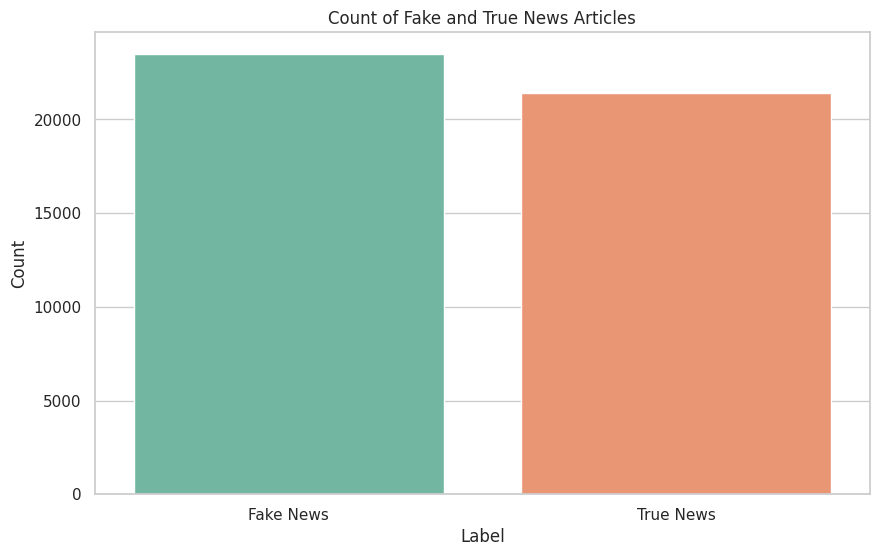

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Count of Fake and True News Articles')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fake News', 'True News'])
plt.show()


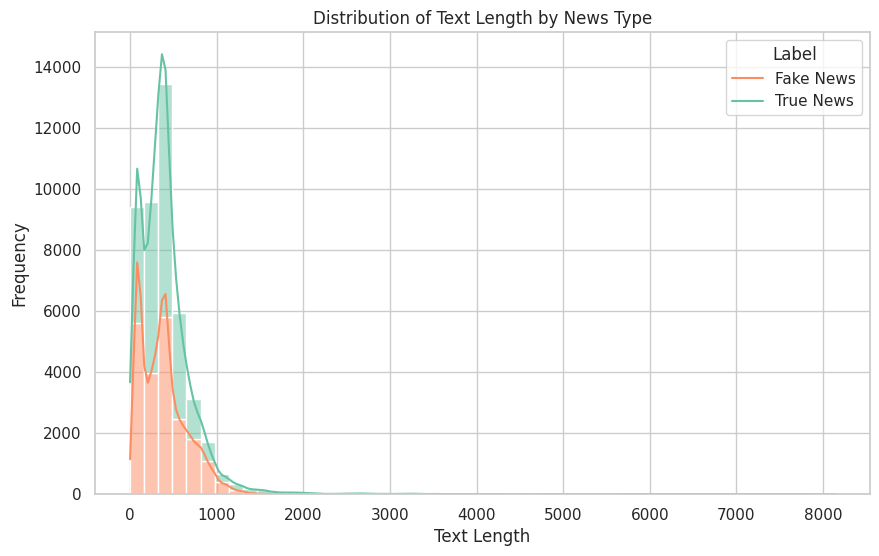

In [ ]:
# Combine the datasets and add a label column
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='text_length', hue='label', multiple='stack', bins=50, palette='Set2', kde=True)
plt.title('Distribution of Text Length by News Type')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=['Fake News', 'True News'])
plt.show()

In [ ]:
## nettoyage du texte
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ''.join([c for c in text if c not in string.punctuation])  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(clean_text)
# Display the first few rows of the cleaned text
print(data[['text', 'cleaned_text']].head())

                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes...   

                                        cleaned_text  
0  donald trump wish americans happy new year lea...  
1  house intelligence committee chairman devin nu...  
2  friday revealed former milwaukee sheriff david...  
3  christmas day donald trump announced would bac...  
4  pope francis used annual christmas day message...  


#### Nuages des mots des fake_news et des vrais news après le nettoyage des données

```python
from wordcloud import WordCloud
import matplotlib.pyplot as plt

WordCloud for Fake News (Cleaned)


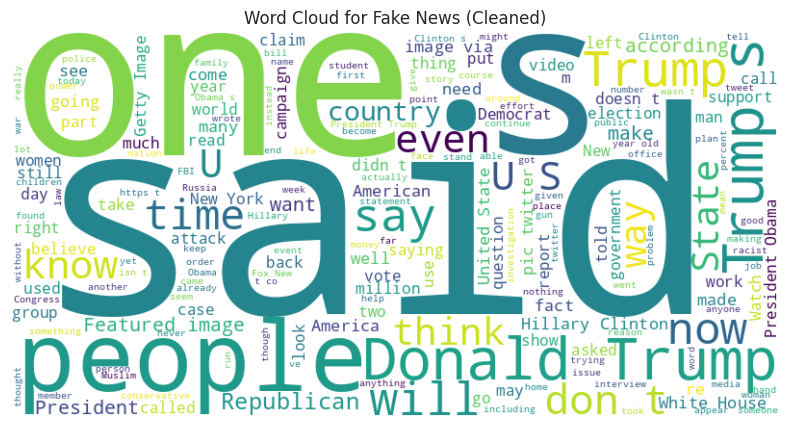

WordCloud for True News (Cleaned)


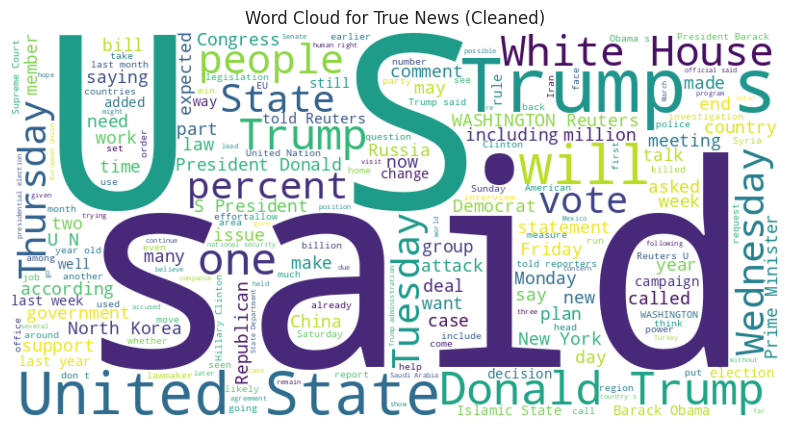

In [ ]:
## des fakes news
print("WordCloud for Fake News (Cleaned)")
plot_wordcloud(data[data['label'] == -1], 'Word Cloud for Fake News (Cleaned)')

# True news
print("WordCloud for True News (Cleaned)")
plot_wordcloud(data[data['label'] == 1], 'Word Cloud for True News (Cleaned)')

#### Analyse semantiques

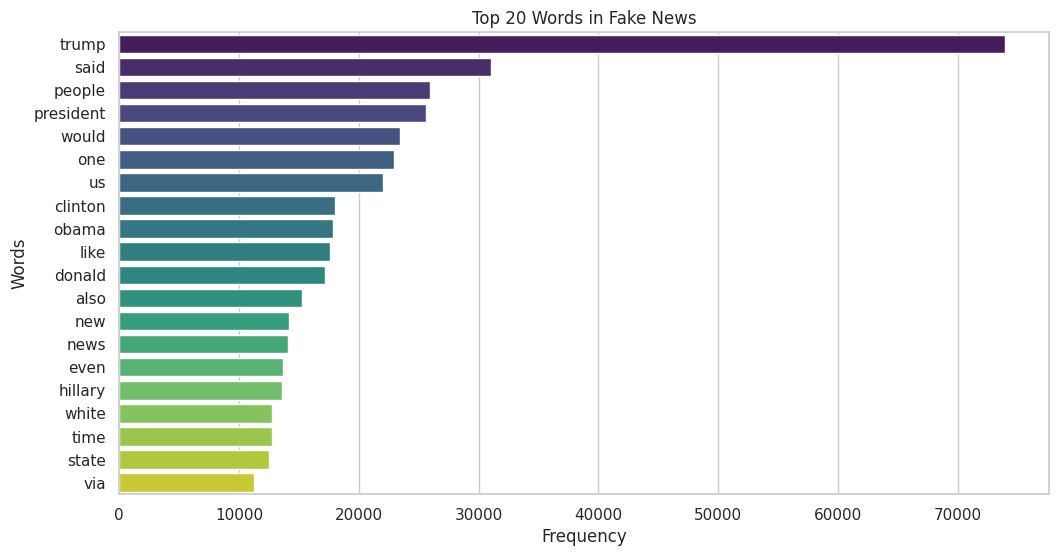

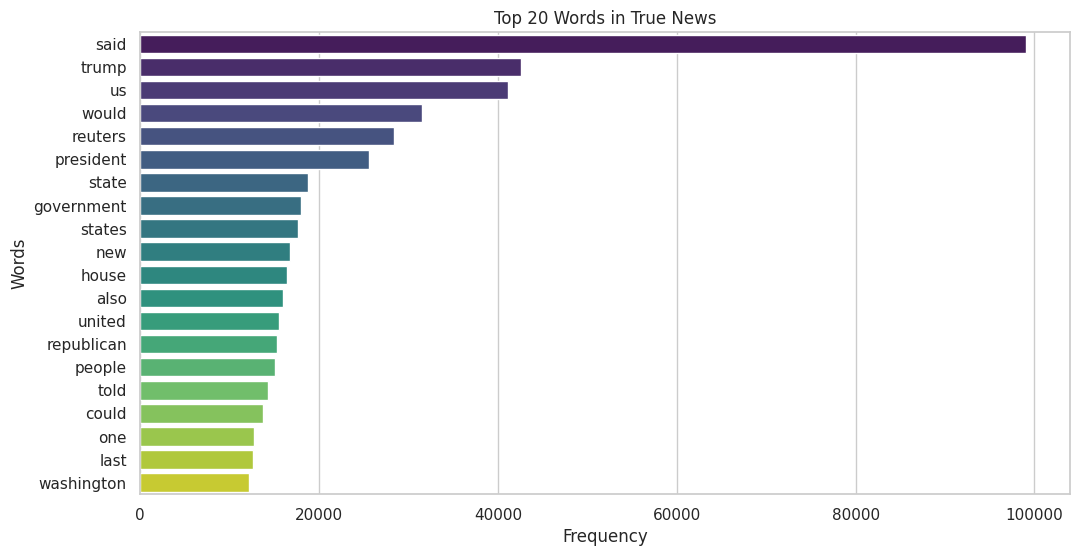

In [ ]:
from collections import Counter # Count the frequency of words in the cleaned text
def analyse_semantic(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([c for c in text if c not in string.punctuation])  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

df = data.copy()
df['tokens'] = df['cleaned_text'].apply(lambda x: analyse_semantic(x))

# counter des mots pour identifier les mots les plus frequents dans les fake news et les true news
fake_words = [word for tokens in df[df['label'] == -1]['tokens'] for word in tokens]
true_words = [word for tokens in df[df['label'] == 1]['tokens'] for word in tokens]
fake_word_counts = Counter(fake_words)
true_word_counts = Counter(true_words)


def plot_top_words(word_counts, title, n=20):
    words, counts =zip(*word_counts.most_common(n))
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Plotting the top 20 words in fake and true news
plot_top_words(fake_word_counts, 'Top 20 Words in Fake News', n=20)
plot_top_words(true_word_counts, 'Top 20 Words in True News', n=20)

In [ ]:
data.tail(10)

,title,text,label,text_length,cleaned_text
44888,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",1,319,sao paulo reuters cesar mata pires owner cofou...
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,1,706,geneva reuters north korea united states clash...
44890,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,1,666,geneva reuters north korea united states accus...
44891,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,1,301,copenhagen reuters danish police said tuesday ...
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,1,455,united nations reuters two north korean shipme...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1,466,brussels reuters nato allies tuesday welcomed ...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1,125,london reuters lexisnexis provider legal regul...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1,320,minsk reuters shadow disused sovietera factori...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1,205,moscow reuters vatican secretary state cardina...
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,1,210,jakarta reuters indonesia buy sukhoi fighter j...


#### Save the cleaned dataset

```
Dataset Save with Unbalanced Classes

```

In [ ]:
data = data[['title', 'cleaned_text', 'label']]

data.to_csv('cleaned_news_dataset.csv', index=False)
print("Cleaned dataset saved to 'cleaned_news_dataset.csv'.")

Cleaned dataset saved to 'cleaned_news_dataset.csv'.


```
Balancing Dataset 

```